In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [55]:
file_path="D:/study/ml/数据分析资料/数据分析资料/day06/code/911.csv"
df=pd.read_csv(file_path)
print(df.head(10))
print(df.info())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6  40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7  40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8  40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9  40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   

       zip                        title            timeStamp  \
0  19525.0       EMS: BACK PAINS/INJURY  2015-12-10 17:10:52   
1  19446.0   

In [56]:
#获取分类情况
temp_list=df["title"].str.split(":").to_list()
cate_list=list(set(i[0] for i in temp_list))
print(cate_list)
#构造全为0的数组
zeros_df=pd.DataFrame(np.zeros((df.shape[0],len(cate_list))),columns=cate_list)
#赋值
for cate in cate_list:
    zeros_df[cate][df["title"].str.contains(cate)]=1
print(zeros_df) 
print(zeros_df["EMS"].sum())

['Traffic', 'EMS', 'Fire']
        Traffic  EMS  Fire
0           0.0  1.0   0.0
1           0.0  1.0   0.0
2           0.0  0.0   1.0
3           0.0  1.0   0.0
4           0.0  1.0   0.0
...         ...  ...   ...
249732      0.0  1.0   0.0
249733      0.0  1.0   0.0
249734      0.0  1.0   0.0
249735      0.0  0.0   1.0
249736      1.0  0.0   0.0

[249737 rows x 3 columns]
124844.0


In [57]:
#方法2
temp_list=df["title"].str.split(":").to_list()
cate_list=[i[0] for i in temp_list]
df["cate"]=pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))
print(df.groupby(by="cate").count()["title"])

cate
EMS        124840
Fire        37432
Traffic     87465
Name: title, dtype: int64


                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:56:52  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

                         zip                    title                twp  \
timeStamp                                                                  
2015-12-10 17

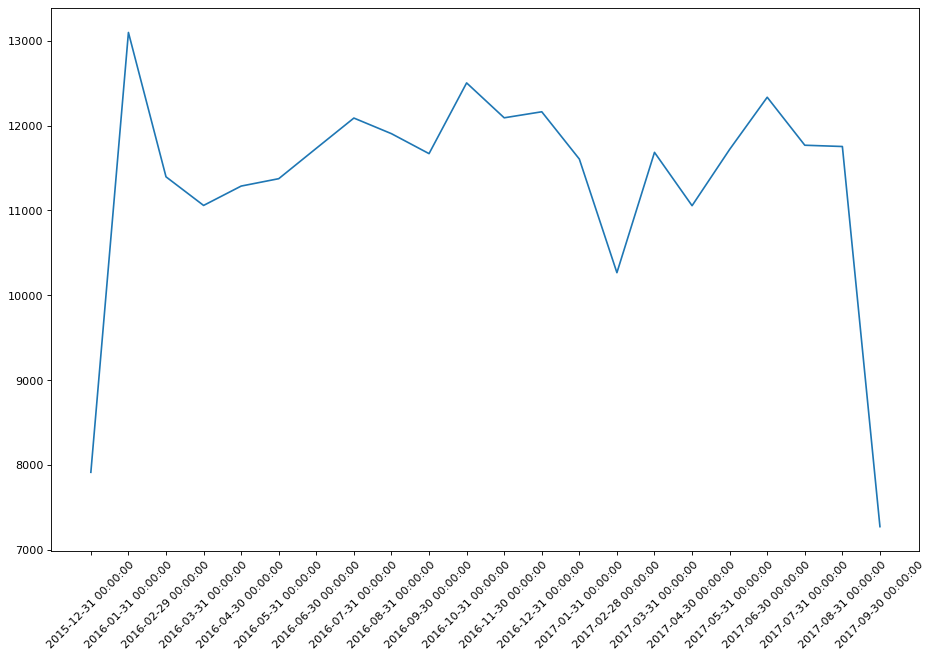

In [61]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])
df.set_index("timeStamp",inplace=True)
print(df.head())
count_by_month=df.resample("M").count()["title"]
print(count_by_month)
_x=count_by_month.index
_y=count_by_month.values
plt.figure(figsize=(14,9),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()

In [60]:
   
#设置添加列，表示分类
temp_list=df["title"].str.split(":").to_list()
cate_list=[i[0] for i in temp_list]
df["cate"]=pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))

#分组
for group_name,group_data in df.groupby(by="cate"):
    #对不同的分类都进行绘图
     count_by_month=group_data.resample("M").count()["title"]
    _x=count_by_month.index
    _y=count_by_month.values
    
    plt.plot(range(len(_x)),_y)
    
plt.xticks(range(len(_x)),_x,rotation=45)
plt.figure(figsize=(14,9),dpi=80)  
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)